In [95]:
# !pip install pandasql

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqldf
from pandasql import sqldf

In [97]:
df = pd.read_csv(r'https://raw.githubusercontent.com/MinhTrong92/Projects/main/Analyze%20Transaction%20Data/transaction_data.csv')

In [98]:
df

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
0,10/30/2019 13:37,10/30/2019,142008725,102161515,1005,100054430,70000,20000
1,10/30/2019 20:26,10/30/2019,142119377,102867263,10050,1792841,80000,20000
2,10/30/2019 12:22,10/30/2019,141986418,100401383,10075,100155720,125000,20000
3,10/30/2019 9:46,10/30/2019,141941958,103213155,10088,103894677,82000,20000
4,10/30/2019 21:56,10/30/2019,142139275,101003290,10142,103909421,260000,20000
...,...,...,...,...,...,...,...,...
4606,11/2/2019 18:22,11/2/2019,142816720,103022399,9949,101915150,450000,20000
4607,11/2/2019 14:09,11/2/2019,142755559,100344658,9957,103201893,80000,20000
4608,11/2/2019 9:54,11/2/2019,142695503,103907242,9967,1892155,250000,20000
4609,11/2/2019 20:48,11/2/2019,142847286,104102998,9967,1892155,1030000,20000


In [99]:
df['txn_date'] = pd.to_datetime(df['txn_date'])

df['txn_time'] = pd.to_datetime(df['txn_time'])

In [100]:
df['order_id'] = df['order_id'].astype(str)
df['uid'] = df['uid'].astype(str)
df['shop_id'] = df['shop_id'].astype(str)
df['shop_owner_uid'] = df['shop_owner_uid'].astype(str)

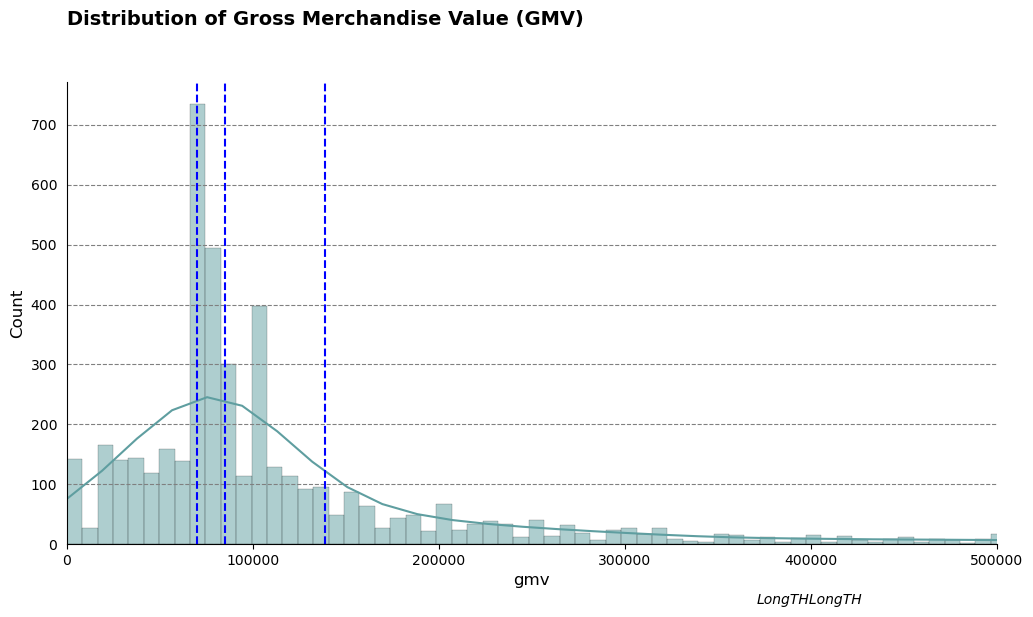

In [101]:
fig, ax = plt.subplots(figsize=(12, 6))

ax=sns.histplot(data=df, x=df.gmv, kde=True, color='#5f9ea0')
ax.axvline(np.percentile(df.gmv, 25), color="blue", linestyle="--")
ax.axvline(np.percentile(df.gmv, 50), color="blue", linestyle="--")
ax.axvline(np.percentile(df.gmv, 75), color="blue", linestyle="--")
plt.xlim(0, 500000)

ax.yaxis.grid(color='gray', linestyle='dashed')
# bỏ đường kẻ ở trên và bên phải chart
spines = ['top', 'right']
for s in spines:
    ax.spines[s].set_visible(False) 
    
# bỏ dấu tích ở 2 trục
ax.tick_params(left=False) 

# thêm title, label các trục và source:
plt.suptitle('Distribution of Gross Merchandise Value (GMV)', fontweight='bold', size=14, horizontalalignment='left', x=0.125, y = 1)
#plt.title('2nd title', style='italic', size=12, loc='left')
plt.xlabel('gmv', size=12)
plt.ylabel('Count', size=12)
plt.text(0.7, 0.01, "LongTHLongTH", style='italic',transform=plt.gcf().transFigure)

plt.show()

In [102]:
df['gmv'].value_counts()

70000     524
100000    316
80000     209
75000     150
20000     123
         ... 
298000      1
20122       1
67600       1
246000      1
266000      1
Name: gmv, Length: 572, dtype: int64

In [103]:
q ="""select Price_Range , sum(total_transaction) as Total_Transaction from (
select case when gmv >= 70000 and gmv < 80000 then '70s' 
            when gmv >= 60000 and gmv < 70000 then '60s' 
            when gmv >= 50000 and gmv < 60000 then '50s' 
            else 'others' end as Price_Range,count(order_id) as total_transaction FROM df group by gmv ) A 
group by Price_Range """
names = sqldf(q)
names

,Price_Range,Total_Transaction
0,50s,175
1,60s,228
2,70s,868
3,others,3340


In [104]:
df.columns

Index(['txn_time', 'txn_date', 'order_id', 'uid', 'shop_id', 'shop_owner_uid',
       'gmv', 'rebate'],
      dtype='object')

In [105]:
df[['txn_time','uid','gmv','rebate']]

,txn_time,uid,gmv,rebate
0,2019-10-30 13:37:00,102161515,70000,20000
1,2019-10-30 20:26:00,102867263,80000,20000
2,2019-10-30 12:22:00,100401383,125000,20000
3,2019-10-30 09:46:00,103213155,82000,20000
4,2019-10-30 21:56:00,101003290,260000,20000
...,...,...,...,...
4606,2019-11-02 18:22:00,103022399,450000,20000
4607,2019-11-02 14:09:00,100344658,80000,20000
4608,2019-11-02 09:54:00,103907242,250000,20000
4609,2019-11-02 20:48:00,104102998,1030000,20000


In [106]:
df['uid'].value_counts()

100205391    26
100605978    23
1026737      16
100393963    10
103653018    10
             ..
102794791     1
1689144       1
100001683     1
103756859     1
100450256     1
Name: uid, Length: 3093, dtype: int64

In [107]:
df[(df['uid']=='103653018')]

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
2657,2019-11-01 15:15:00,2019-11-01,142536464,103653018,4342,103284688,80000,20000
2658,2019-11-01 15:05:00,2019-11-01,142533244,103653018,4809,103333474,70000,20000
2659,2019-11-01 15:08:00,2019-11-01,142534067,103653018,5786,103481792,100000,20000
2660,2019-11-01 15:06:00,2019-11-01,142533573,103653018,5808,103483282,80000,20000
2675,2019-11-01 15:36:00,2019-11-01,142542559,103653018,5956,103488979,110000,20000
2676,2019-11-01 15:13:00,2019-11-01,142535615,103653018,6840,103562487,70000,20000
2677,2019-11-01 15:09:00,2019-11-01,142534416,103653018,6909,103568418,105000,20000
2678,2019-11-01 15:10:00,2019-11-01,142534694,103653018,6917,103569882,70000,20000
2695,2019-11-01 15:14:00,2019-11-01,142536057,103653018,7181,103571723,105000,20000
2696,2019-11-01 15:37:00,2019-11-01,142542936,103653018,7653,103662116,80000,20000


In [108]:
df[df['gmv']<10000]

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
5,2019-10-30 10:31:00,2019-10-30,141951971,100614916,10163,103915242,1,0
52,2019-10-30 10:50:00,2019-10-30,141956702,102547028,10564,102615537,68,0
53,2019-10-30 11:01:00,2019-10-30,141959539,102547028,10564,102615537,68,0
153,2019-10-30 14:44:00,2019-10-30,142034827,100614916,1240,103015138,1,0
171,2019-10-30 12:51:00,2019-10-30,141994408,100393963,2084,102582879,123,0
...,...,...,...,...,...,...,...,...
2994,2019-11-01 17:10:00,2019-11-01,142566308,1494836,8812,1639260,6000,0
3675,2019-11-02 09:51:00,2019-11-02,142694952,100619769,30219,104095378,1,0
3676,2019-11-02 12:05:00,2019-11-02,142726425,100352740,30223,104095417,1,0
3677,2019-11-02 12:05:00,2019-11-02,142726479,100352740,30223,104095417,1,0


In [109]:
df['shop_id'].value_counts()

10979    256
4673      50
4809      31
5786      30
9256      29
        ... 
6773       1
7014       1
725        1
7329       1
9980       1
Name: shop_id, Length: 1385, dtype: int64

In [110]:
df[['shop_owner_uid','shop_id']].value_counts()

shop_owner_uid  shop_id
102817559       10979      256
103280547       4673        50
103333474       4809        31
103481792       5786        30
103483282       5808        29
                          ... 
1011329         29379        1
103499618       6066         1
101128203       30016        1
1011280         29350        1
103037586       4375         1
Length: 1385, dtype: int64

In [111]:
df[(df['shop_id'] == '9256')]

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
820,2019-10-30 10:24:00,2019-10-30,141950348,100644071,9256,103835793,125000,20000
821,2019-10-30 15:45:00,2019-10-30,142055334,102179463,9256,103835793,125000,20000
822,2019-10-30 19:42:00,2019-10-30,142108269,1833953,9256,103835793,50000,15000
823,2019-10-30 20:12:00,2019-10-30,142116033,100934767,9256,103835793,100000,20000
824,2019-10-30 21:02:00,2019-10-30,142128060,1597901,9256,103835793,175000,20000
825,2019-10-30 21:22:00,2019-10-30,142132281,100472741,9256,103835793,25000,7500
826,2019-10-30 22:05:00,2019-10-30,142141586,100613947,9256,103835793,25000,7500
827,2019-10-30 22:39:00,2019-10-30,142149635,103836621,9256,103835793,75000,20000
1911,2019-10-31 14:19:00,2019-10-31,142267698,100613947,9256,103835793,65000,19500
1912,2019-10-31 19:51:00,2019-10-31,142352716,101227538,9256,103835793,55000,16500


In [112]:
df[df['rebate'] == 0 ]


,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
5,2019-10-30 10:31:00,2019-10-30,141951971,100614916,10163,103915242,1,0
22,2019-10-30 17:34:00,2019-10-30,142079537,103040497,1023,100910348,145000,0
28,2019-10-30 20:12:00,2019-10-30,142116105,100644529,10231,103895518,20000,0
33,2019-10-30 21:24:00,2019-10-30,142132777,101574266,10283,100675839,70000,0
52,2019-10-30 10:50:00,2019-10-30,141956702,102547028,10564,102615537,68,0
...,...,...,...,...,...,...,...,...
4460,2019-11-02 13:09:00,2019-11-02,142743128,100717535,9006,103587193,55000,0
4465,2019-11-02 18:08:00,2019-11-02,142813572,100741185,9019,103189670,25000,0
4480,2019-11-02 22:48:00,2019-11-02,142865169,100380012,9128,100307126,35000,0
4540,2019-11-02 10:34:00,2019-11-02,142703243,102894761,9383,103860624,1,0


In [113]:
df['txn_date'].value_counts()


2019-11-02    1529
2019-10-31    1086
2019-11-01    1060
2019-10-30     936
Name: txn_date, dtype: int64

In [114]:
q = """select distinct(uid),count(order_id) as total_transaction, gmv FROM df
       where gmv < 10000
       group by uid,gmv
       order by count(order_id) desc
       limit 21;
       """

names=sqldf(q)
names

,uid,total_transaction,gmv
0,100605978,19,1
1,1026737,15,1
2,100205391,14,100
3,100205391,10,1000
4,100614916,6,1
5,101065061,6,1
6,100352740,5,1
7,100393963,5,123
8,101039570,5,1
9,100027807,4,1


In [115]:
df[df['uid'] == '1026737']

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
355,2019-10-30 10:09:00,2019-10-30,141946919,1026737,29824,104050582,1,0
356,2019-10-30 10:26:00,2019-10-30,141950850,1026737,29826,102164897,1,0
363,2019-10-30 11:44:00,2019-10-30,141972711,1026737,29860,102368516,1,0
364,2019-10-30 12:51:00,2019-10-30,141994360,1026737,29860,102368516,75000,20000
365,2019-10-30 12:05:00,2019-10-30,141980619,1026737,29864,104052244,1,0
367,2019-10-30 12:45:00,2019-10-30,141993053,1026737,29870,104052685,1,0
426,2019-10-30 10:38:00,2019-10-30,141953525,1026737,3690,103203317,1,0
1353,2019-10-31 09:49:00,2019-10-31,142196909,1026737,29974,2046542,1,0
1356,2019-10-31 10:11:00,2019-10-31,142201439,1026737,29977,101377664,1,0
1357,2019-10-31 10:15:00,2019-10-31,142202375,1026737,29977,101377664,1,0


In [116]:
df['shop_id'].value_counts()

10979    256
4673      50
4809      31
5786      30
9256      29
        ... 
6773       1
7014       1
725        1
7329       1
9980       1
Name: shop_id, Length: 1385, dtype: int64

In [117]:
df[['shop_id','shop_owner_uid']].groupby('shop_owner_uid').count()

,shop_id
shop_owner_uid,
1000025,5
100003663,1
1000041,4
1000042,2
100032676,2
...,...
2050480,5
2059584,1
2060093,9


In [123]:
q = """select count(distinct(shop_id)) as total_shops,shop_owner_uid FROM df 
       group by shop_owner_uid
       order by total_shops desc
       limit 10;"""

names = sqldf(q)
names

,total_shops,shop_owner_uid
0,8,1010911
1,7,1006513
2,6,1009512
3,5,1008584
4,5,1005623
5,5,1005510
6,4,1011828
7,4,1010632
8,4,1010362
9,4,1009053


In [119]:
df[df['shop_owner_uid'] == '1010911']

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
290,2019-10-30 20:33:00,2019-10-30,142121083,101185359,29172,1010911,270000,20000
291,2019-10-30 21:19:00,2019-10-30,142131645,100958570,29172,1010911,65000,19500
292,2019-10-30 21:20:00,2019-10-30,142131890,103011035,29172,1010911,65000,19500
293,2019-10-30 21:26:00,2019-10-30,142133245,100958570,29172,1010911,50000,0
294,2019-10-30 16:00:00,2019-10-30,142059640,100525763,29173,1010911,60000,18000
295,2019-10-30 09:29:00,2019-10-30,141938387,1803551,29176,1010911,240000,20000
296,2019-10-30 18:58:00,2019-10-30,142096550,103999789,29177,1010911,60000,18000
1267,2019-10-31 21:10:00,2019-10-31,142368769,101204960,29168,1010911,630000,20000
1268,2019-10-31 09:02:00,2019-10-31,142189296,1803551,29171,1010911,150000,20000
1269,2019-10-31 15:17:00,2019-10-31,142290788,102311038,29172,1010911,260000,20000


In [120]:
df['shop_id'].value_counts()

10979    256
4673      50
4809      31
5786      30
9256      29
        ... 
6773       1
7014       1
725        1
7329       1
9980       1
Name: shop_id, Length: 1385, dtype: int64

In [121]:
data2 = df[(df['gmv']<10000)&(df['rebate']==0)]
data2

,txn_time,txn_date,order_id,uid,shop_id,shop_owner_uid,gmv,rebate
5,2019-10-30 10:31:00,2019-10-30,141951971,100614916,10163,103915242,1,0
52,2019-10-30 10:50:00,2019-10-30,141956702,102547028,10564,102615537,68,0
53,2019-10-30 11:01:00,2019-10-30,141959539,102547028,10564,102615537,68,0
153,2019-10-30 14:44:00,2019-10-30,142034827,100614916,1240,103015138,1,0
171,2019-10-30 12:51:00,2019-10-30,141994408,100393963,2084,102582879,123,0
...,...,...,...,...,...,...,...,...
2994,2019-11-01 17:10:00,2019-11-01,142566308,1494836,8812,1639260,6000,0
3675,2019-11-02 09:51:00,2019-11-02,142694952,100619769,30219,104095378,1,0
3676,2019-11-02 12:05:00,2019-11-02,142726425,100352740,30223,104095417,1,0
3677,2019-11-02 12:05:00,2019-11-02,142726479,100352740,30223,104095417,1,0


In [124]:
q = """select count(order_id) as total_transaction,shop_owner_uid
       FROM data2 
       group by shop_owner_uid
       order by total_transaction desc
       limit 10;"""

names = sqldf(q)
names

,total_transaction,shop_owner_uid
0,5,1006513
1,4,104080159
2,4,1011881
3,4,1007436
4,3,104081012
5,3,103932347
6,3,1011828
7,3,1011823
8,3,1011329
9,3,1005623
